### This program uses Artificial recurrent neural network LSTM to predict closing stock price

In [1]:
#importing the libraries
import math
import pandas_datareader as web
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [2]:
ticker = '^GSPC'

In [3]:
#getting the stock quote
df = web.DataReader(ticker,data_source='yahoo',start='2012-01-01',end='2022-10-24')
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2012-01-03,1284.619995,1258.859985,1258.859985,1277.060059,3943710000,1277.060059
2012-01-04,1278.729980,1268.099976,1277.030029,1277.300049,3592580000,1277.300049
2012-01-05,1283.050049,1265.260010,1277.300049,1281.060059,4315950000,1281.060059
2012-01-06,1281.839966,1273.339966,1280.930054,1277.810059,3656830000,1277.810059
2012-01-09,1281.989990,1274.550049,1277.829956,1280.699951,3371600000,1280.699951
...,...,...,...,...,...,...
2022-10-18,3762.790039,3686.530029,3746.260010,3719.979980,4483740000,3719.979980
2022-10-19,3728.580078,3666.510010,3703.110107,3695.159912,4223800000,3695.159912
2022-10-20,3736.000000,3656.439941,3689.050049,3665.780029,4496620000,3665.780029


In [4]:
#Getting the number of rows and columns in the dataset
df.shape

(2721, 6)

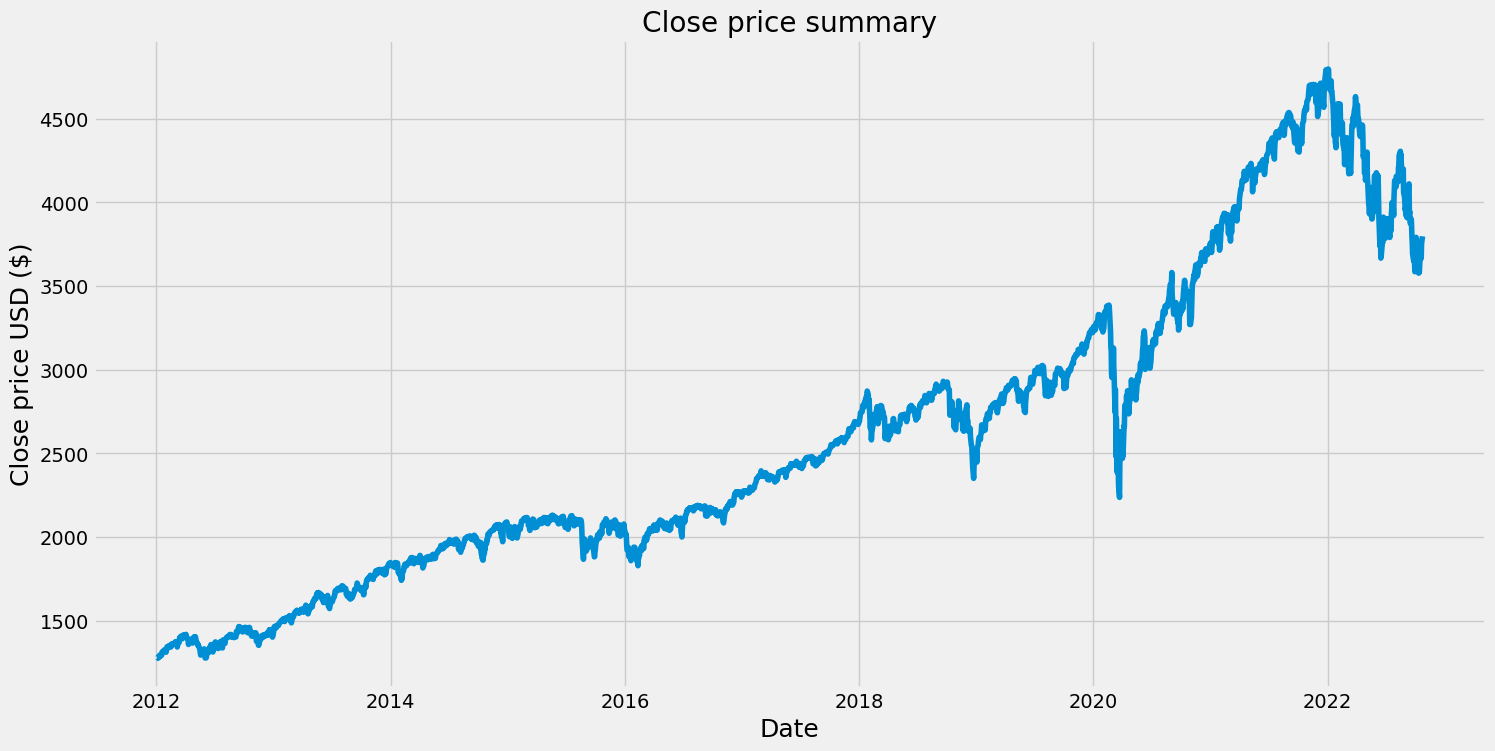

In [5]:
#visualize the closing price history
plt.figure(figsize=(16,8))
plt.title('Close price summary')
plt.plot(df['Close'])
plt.xlabel('Date',fontsize=18)
plt.ylabel('Close price USD ($)',fontsize=18)
plt.show()

In [6]:
#create a new dataframe with just the close column
data = df.filter(['Close'])
#convert the dataframe to a numpy array
dataset = data.values
#getting the number of rows to train the model on 
training_data_len = math.ceil(len(dataset)*0.8)

training_data_len

2177

In [7]:
#Scaling the data
scalar = MinMaxScaler(feature_range=(0,1))
scaled_data = scalar.fit_transform(dataset)
scaled_data

array([[0.00000000e+00],
       [6.81887298e-05],
       [1.13652507e-03],
       ...,
       [6.78710036e-01],
       [7.03420924e-01],
       [7.16090362e-01]])

In [8]:
#Create the training dataset
#create a scaled dataset
train_data = scaled_data[0:training_data_len, :]
#split the data into X_train and y_train datasets
X_train=[]
y_train=[]

for i in range(60,len(train_data)):
    X_train.append(train_data[i-60:i,0])
    y_train.append(train_data[i,0])
    if i <=60:
        print(X_train)
        print(y_train)
        print()

[array([0.00000000e+00, 6.81887298e-05, 1.13652507e-03, 2.13098451e-04,
       1.03420730e-03, 4.26762252e-03, 4.38128196e-03, 5.23936395e-03,
       3.41807280e-03, 4.71941621e-03, 8.80238115e-03, 1.06378580e-02,
       1.08878950e-02, 1.10640550e-02, 1.06804847e-02, 1.39224322e-02,
       1.17545092e-02, 1.11578058e-02, 1.02145052e-02, 1.00440334e-02,
       1.33626672e-02, 1.37746784e-02, 1.92754556e-02, 1.91134813e-02,
       1.98863447e-02, 2.07131417e-02, 2.12785602e-02, 1.86333161e-02,
       2.12274360e-02, 2.08665837e-02, 1.88009438e-02, 2.30089446e-02,
       2.39153067e-02, 2.41937498e-02, 2.29009733e-02, 2.45489139e-02,
       2.51967415e-02, 2.57223774e-02, 2.70265649e-02, 2.51797116e-02,
       2.75692306e-02, 2.63020163e-02, 2.47961067e-02, 1.88378823e-02,
       2.14717847e-02, 2.52450563e-02, 2.66543363e-02, 2.67168368e-02,
       3.37803360e-02, 3.33058590e-02, 3.56698159e-02, 3.61159214e-02,
       3.77013614e-02, 3.64994917e-02, 3.57522250e-02, 3.28796621e-02,
     

In [9]:
train_data

array([[0.00000000e+00],
       [6.81887298e-05],
       [1.13652507e-03],
       ...,
       [6.12081253e-01],
       [6.15587458e-01],
       [6.25563268e-01]])

In [10]:
#Convert the X_train and y_train to numpy array
X_train,y_train = np.array(X_train),np.array(y_train)

In [11]:
X_train.shape

(2117, 60)

In [12]:
#reshape the data as the LSTM expects the data to be in 3 dimensional
X_train = np.reshape(X_train,(X_train.shape[0],X_train.shape[1],1))
X_train.shape

(2117, 60, 1)

### Building the LSTM model

In [13]:
model = Sequential()
model.add(LSTM(50,return_sequences=True, input_shape=(X_train.shape[1],1)))
model.add(LSTM(50,return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

2022-11-06 10:33:35.484331: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [14]:
#Compile the model
model.compile(optimizer='adam',loss='mean_squared_error')

In [15]:
model.fit(X_train,y_train,batch_size=1,epochs=4)

Epoch 1/4
2117/2117 [==============================] - 30s 13ms/step - loss: 5.3355e-04
Epoch 2/4
2117/2117 [==============================] - 28s 13ms/step - loss: 2.5482e-04
Epoch 3/4
2117/2117 [==============================] - 28s 13ms/step - loss: 1.8300e-04
Epoch 4/4
2117/2117 [==============================] - 28s 13ms/step - loss: 1.8234e-04


In [16]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 60, 50)            10400     
                                                                 
 lstm_1 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 25)                1275      
                                                                 
 dense_1 (Dense)             (None, 1)                 26        
                                                                 
Total params: 31,901
Trainable params: 31,901
Non-trainable params: 0
_________________________________________________________________


In [17]:
#Creating the testing dataset
#Create a new array containing scaled value from index 2117 to 2721
test_data = scaled_data[training_data_len-60:,:]
#create the dataset X_test,y_test
X_test=[]
y_test=dataset[training_data_len:,:]

for i in range(60,len(test_data)):
    X_test.append(test_data[i-60:i,0])

In [18]:
#CONVERT THE DATA INTO A np.array
X_test = np.array(X_test)

In [19]:
X_test.shape

(544, 60)

In [20]:
#Reshaping the data
X_test = np.reshape(X_test,(X_test.shape[0],X_test.shape[1],1))
X_test.shape

(544, 60, 1)

In [21]:
#Getting the model predicted price value
predictions = model.predict(X_test)

17/17 [==============================] - 1s 10ms/step


In [22]:
predictions.shape

(544, 1)

In [23]:
predictions=scalar.inverse_transform(predictions)

In [24]:
predictions.shape

(544, 1)

In [25]:
#Getting the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(predictions-y_test)**2)
rmse

79.14821355483112

/var/folders/r5/3bmqd5d91l7d11d1x39m82v00000gn/T/ipykernel_41376/2628329274.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['predictions'] = predictions


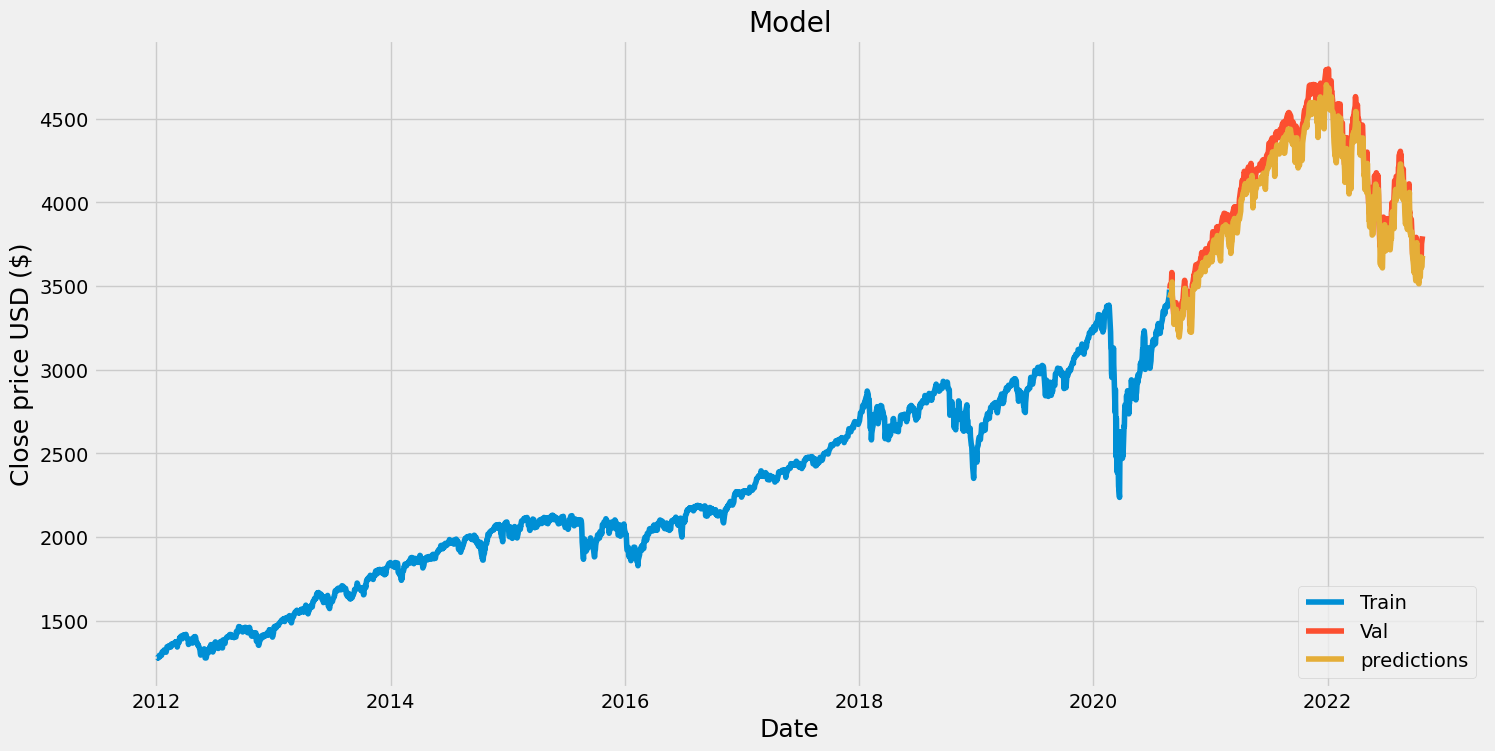

In [26]:
#plot
train = data[:training_data_len]
valid = data[training_data_len:]
valid['predictions'] = predictions
#visualize the model
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close price USD ($)',fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close','predictions']])
plt.legend(['Train','Val','predictions'],loc='lower right')
plt.show()

In [27]:
#Show the valid and predicted price
valid

,Close,predictions
Date,,
2020-08-27,3484.550049,3429.714844
2020-08-28,3508.010010,3438.924561
2020-08-31,3500.310059,3456.483154
2020-09-01,3526.649902,3450.717285
2020-09-02,3580.840088,3469.517090
...,...,...
2022-10-18,3719.979980,3614.357178
2022-10-19,3695.159912,3673.941162
2022-10-20,3665.780029,3654.650635


In [28]:
#Get the quote 
Stock_quote = web.DataReader(ticker,data_source='yahoo',start='2020-01-01',end='2022-10-24')
#Create a new dataframe
new_df = Stock_quote.filter(['Close'])
#get the last 60 day closing values and convert the dataframe to an array
last_60_days = new_df[-60:].values
#scale the data to values between 0 and 1
last_60_days_scaled = scalar.transform(last_60_days)
#create an empty list
X_test = []
#append the past 60 days
X_test.append(last_60_days_scaled)
#Convert the X_test dataset to numpy array
X_test = np.array(X_test)
#Reshape the data to 3D
X_test == np.reshape(X_test,(X_test.shape[0],X_test.shape[1],1))
#get the predicted price
pred_price = model.predict(X_test)
#Undo scaling
pred_price = scalar.inverse_transform(pred_price)
print(pred_price)

1/1 [==============================] - 1s 518ms/step
[[3746.0994]]


In [29]:
from datetime import date

today = date.today()
print("Today's date:", today)


Today's date: 2022-11-06


In [31]:
Stock_quote2 = web.DataReader(ticker,data_source='yahoo',start='11-04-22',end='11-04-22')
print(Stock_quote2['Close'])

Date
2022-11-04    3770.550049
Name: Close, dtype: float64


In [32]:
Price_difference = pred_price[0]-Stock_quote2['Close']
percent_change=Price_difference[0]/Stock_quote2['Close'][0]
print('Based on this analysis, there is a price difference of ${:.2f} from the predicted cost to the actual cost with % {:.2f} difference.'.format(Price_difference[0],percent_change))

Based on this analysis, there is a price difference of $-24.45 from the predicted cost to the actual cost with % -0.01 difference.
